In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import mglearn

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


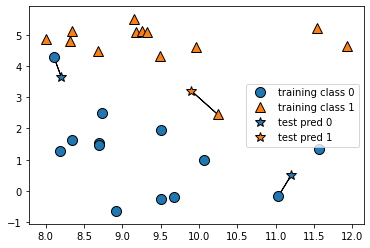

In [2]:
# make_forge로 생성된 데이터에 knn 적용한 경과 시각화
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


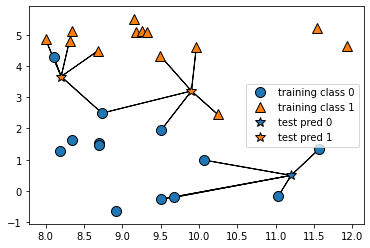

In [3]:
# make_forge로 생성된 데이터에 knn 적용한 경과 시각화
# n_neighbors=홀수로 넣는 이유: 짝수로 넣으면 2:2 될수 있으므로.. (오류는 아니지만 애매할수 있기 때문에 홀수로 진행)
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [4]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))   
#과대적합 상황임

1.0
0.8571428571428571


AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


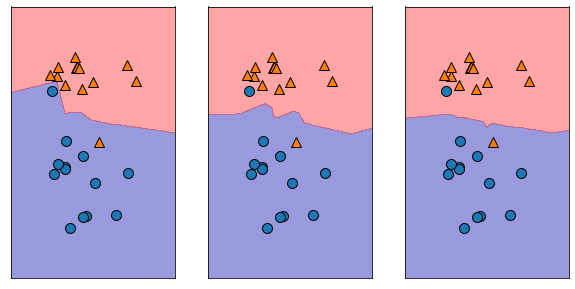

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10,5)) #subplots: 여러개의 plot을 초기화  (1,3) 1행 3열을 그리겠다는 의미
for n, ax in zip([1, 3, 9], axes):   
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
#     print(knn.score(X_train, y_train) , ' / ', knn.score(X_test, y_test)) 
    print(ax)
    mglearn.plots.plot_2d_separator(knn, X, ax=ax, fill=True, alpha=0.4)   # ax: plot객체 ,fill: 평면 칠하기, alpha: 투명도
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
plt.show()

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
len(y), y.sum() , len(y) - y.sum()   # len(y) = 569 , y.sum() = 357  =>데이터 비율이 다름

(26, 13, 13)

In [135]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,random_state=42)  #stratify = y : y에 있는 비율로 유지해 달라는 표시

In [10]:
train_accuracy=[]
test_accuracy=[]
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

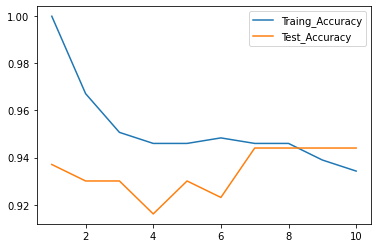

In [11]:
plt.plot(range(1,11), train_accuracy , label="Traing_Accuracy")
plt.plot(range(1,11), test_accuracy, label="Test_Accuracy")
plt.legend()
plt.show()

In [ ]:
# 회귀(연속형)

In [14]:
import mglearn

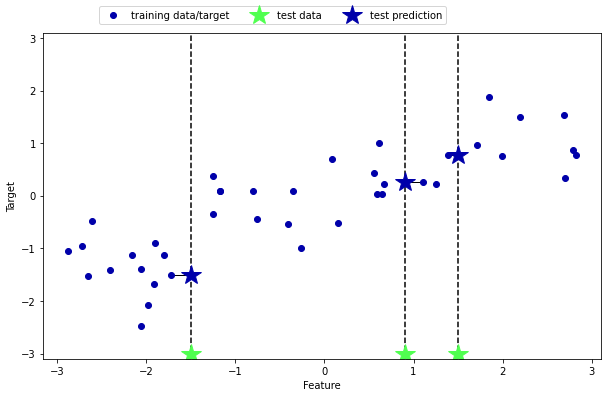

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

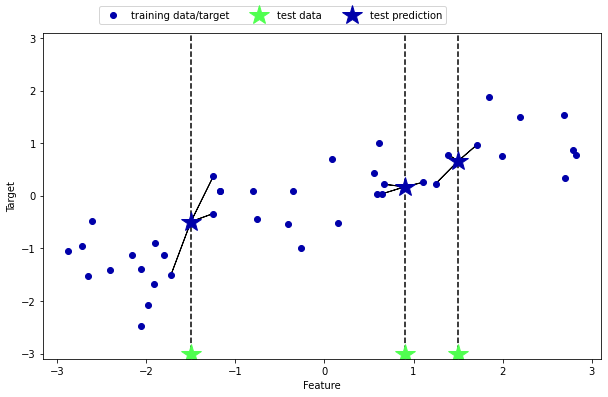

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [31]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor      #회귀(연속형데이터 이용)

In [45]:
X,y = mglearn.datasets.make_wave(n_samples=40)   # make_wave():100개의 데이터 / n_samples=40 : 40개의 데이터 표시
print(X.shape, y.shape)    #설명변수 -> 2차원 배열형식으로 맞춰 넣어줘야함.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knnr = KNeighborsRegressor(n_neighbors=9)
knnr.fit(X_train, y_train) # 훈련기반 데이터 저장

(40, 1) (40,)


KNeighborsRegressor(n_neighbors=9)

In [46]:
predicted_y = knnr.predict(X_test)
# predicted_y[:5]
# (predicted_y == y_test).sum() #회귀에서는 값의 일치성 비교하면 값이 안맞음. 그래서 회귀에서는 일치성 비교하지 않는다. (오차를 줄이는 접근.)
print(knnr.score(X_train, y_train))
print(knnr.score(X_test, y_test)) # R-squared value      #1에 가까울수록 좋은 모델이다. 

0.7094916581540827
0.7362262928237624


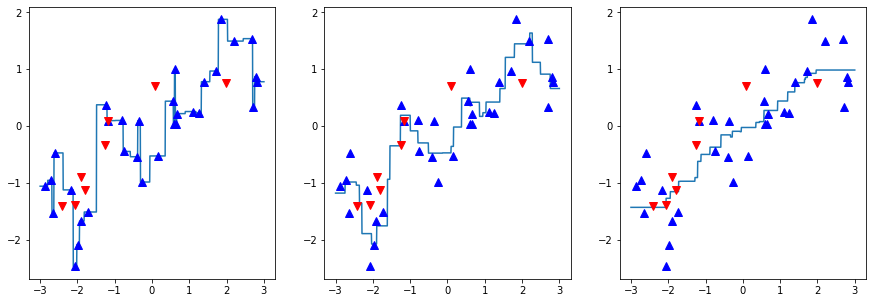

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))   #subplots(1,3) => 1행3열
line = np.linspace(-3, 3, 1000)
line= line.reshape(-1,1)     #1d array -> 2d array (열은 1로 고정) 
for n,ax in zip([1,3,9], axes):
    knnr = KNeighborsRegressor(n_neighbors=n)
    knnr.fit(X_train, y_train)
    ax.plot(line, knnr.predict(line))   #line= line.reshape(-1,1) 가 x축
    ax.plot(X_train, y_train, "^", c='blue', markersize=8)
    ax.plot(X_test, y_test, "v", c='red', markersize=8)
   
plt.show()   #오차가 크면 과대적합 데이터일수 있다. 라인 오차가 작을수록 좋은 데이터

In [37]:
# line = np.linspace(-3, 3, 12)   
# line.reshape(-1, 3)   #line.shape(4,3) #-1: 무엇이 들어갈지 알수없음(미확정). 하지만 그 데이터를 4열로 만들라는 의미  
# line.reshape(4, -1)

array([[-3.        , -2.45454545, -1.90909091],
       [-1.36363636, -0.81818182, -0.27272727],
       [ 0.27272727,  0.81818182,  1.36363636],
       [ 1.90909091,  2.45454545,  3.        ]])

In [51]:
from sklearn.datasets import load_boston

boston=load_boston()
# print(boston['data'].shape, boston['target'].shape)
# print(boston['data'][:2])
X, y = boston['data'], boston['target']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [67]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train, y_train)

print(knnr.score(X_train, y_train), '/' , knnr.score(X_test, y_test))

0.7524897290455947 / 0.6946008632462907


In [76]:
from sklearn.preprocessing import MinMaxScaler   

mms = MinMaxScaler()   #데이터 0과 1사이로 변환
mms.fit(X_train)


X_train_transformed = mms.transform(X_train)
print(X_train[:,0].min(),X_train[:,0].max())   #속성의 값이 너무 차이가 나서 MinMaxScaler 사용하여 값을 0과 1사이의 값으로 조정해줌.
print(X_train_transformed[:, 0].min(), X_train_transformed[:, 0].max())  # 데이터가 0과 1사이 표준화 된다.
X_test_transformed = mms.transform(X_test)
print(X_test_transformed[:, 1].min(), X_test_transformed[:, 1].max())   
# test 데이터는 0과1사이 가 아님. 훈련데이터와 test데이터셋이 다르므로 mms값이 다름/ 그렇기 때문에 0과1사이값으로 나오지 않음. mms.fit(train)만 잡았기 때문에 .. 
# 그렇다고 test를 mms 조작을 주면 안된다. test는 test일뿐이므로~ 훈련할때 그대로 test값을 가져와야함. 

0.00906 88.9762
0.0 1.0000000000000002
0.0 0.9500000000000001


In [70]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train_transformed, y_train)

knnr.score(X_train_transformed, y_train), knnr.score(X_test_transformed, y_test)

(0.890446563451937, 0.7309605924331992)

In [ ]:
# data-files/diabetes.csv 파일의 데이터를 사용해서
# knn 알고리즘 분류기를 만들고
# 훈련데이터와 테스트데이터의 예측 성능 평가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier   #데이터 분류 = KNeighborsClassifier 사용
from sklearn.preprocessing import MinMaxScaler

In [3]:
diabetes = pd.read_csv('data-files/diabetes.csv', encoding='utf-8')

In [5]:
diabetes.info()
# diabetes.shape
diabetes.head()    # 목적변수 : Outcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# X = diabetes.drop('Outcome', axis=1).values
# y =diabetes["Outcome"].values
X,y = diabetes.iloc[:, :-1], diabetes.iloc[:,-1]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=330)    #분할 작업

(768, 8) (768,)


In [21]:
np.unique(y, return_counts=True)   #y값 상태 확인. 고유값: 0,1 / 0=500개, 1=268개. 불균형한 데이터셋은 stratify=y 하는게 좋음.(y축 기준으로 분배를 같게 넣어 달라는 표시임)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

In [22]:
mms = MinMaxScaler()
mms.fit(X_train) # X_train 데이터 사용해서 min, max 학습

MinMaxScaler()

In [23]:
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [29]:
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# (knnc.predict(X_train_scaled) == y_train).sum()
print(knnc.score(X_train_scaled, y_train))
print(knnc.score(X_test_scaled, y_test))

0.8680555555555556
0.703125
